In [31]:
!pip install seaborn

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aug_train.csv')

In [5]:
# df.head()
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
11691,26222,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,<10,Early Stage Startup,1,149,0.0
8485,23440,city_67,0.855,NaN,No relevent experience,no_enrollment,High School,NaN,1,NaN,NaN,never,96,0.0
1812,861,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,2,262,0.0
11103,31330,city_23,0.899,Female,Has relevent experience,Part time course,Graduate,STEM,5,10000+,Pvt Ltd,3,69,0.0
949,23511,city_100,0.887,Male,No relevent experience,Part time course,Graduate,STEM,5,NaN,NaN,3,54,0.0


In [4]:
# how big is data
df.shape

(19158, 14)

In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
df_cleaned = df.dropna()
df_cleaned

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [19]:
df_dropped_cols = df.drop(columns=['company_size', 'company_type', 'gender', 'major_discipline'])
df_dropped_cols = df_dropped_cols.set_index('enrollee_id')
df_dropped_cols

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
enrollee_id,,,,,,,,,
8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
33241,city_115,0.789,No relevent experience,NaN,Graduate,<1,never,52,1.0
666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0


In [9]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.drop_duplicates()

In [26]:
print(df.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [29]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()['city_development_index']

enrollee_id              -0.040455
city_development_index    1.000000
training_hours            0.001920
target                   -0.341665
Name: city_development_index, dtype: float64

In [24]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

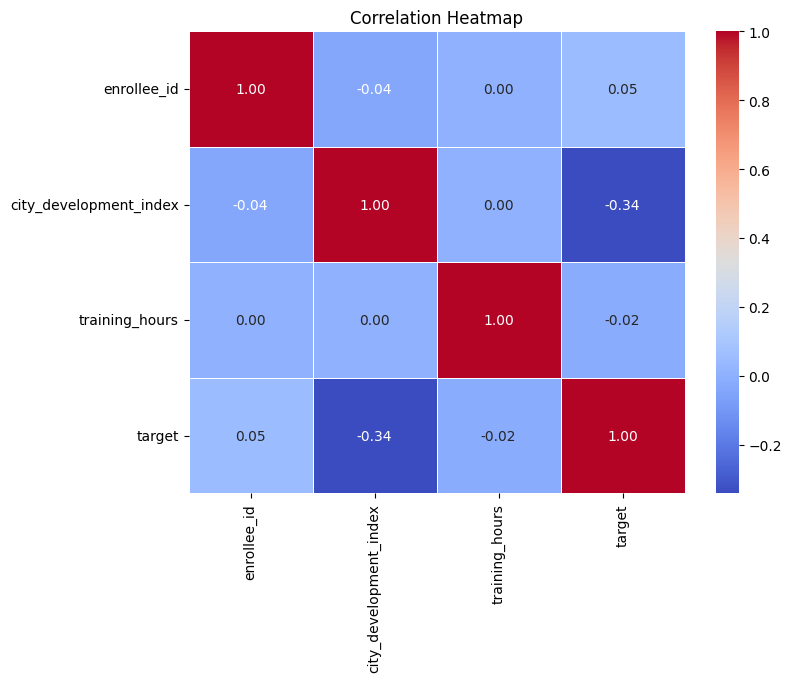

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Set plot size
plt.figure(figsize=(8, 6))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


In [38]:
plt.scatter(df['training_hours',df['city_developement_index']])

KeyError: 'city_developement_index'